# Create explanatory variables fields

MICA system works with Multiple Linear Regressions (MLR) whose independent variables are known as explanatory variables. These variables fields are needed in order to interpolate the regression models. Then, before starting the MLR models calculation and the interpolation itself, we need to prepare the explanatory data fields. 

In this case we'll show how to obtain altitude and distance to coast fields.

### Altitude

A Digital Elevation Model (DEM) with the extent and resolution of the final interpolated field we want to obtain. It must be a raster image.

### Distance to coast

This raster is built using a logarithmic function $d_{coast} = 1 - e^{-\dfrac{3\cdot dist}{D}}$, where $d_{coast}$ is the resultant distance to coast of the function, *dist* is the Euclidean distance from a point to the coast line and *D* is the distance where the distance to coast is cancelled.

The distance to coast raster is built using `get_dist_array` function. Now, we'll import it.

In [1]:
from distance.distance_to_sea import get_dist_array

The `get_dist_array` function returns a matrix with the distance to sea values. It receives as parameters:

   - proj        : The EPSG code for the output matrix projection  
   - geotransform: The output raster geotransform
   - size        : The output raster size
   - dist_file   : The path to an ogr compatible file with a line containing the shore geometry

Now, we'll call the `get_dist_array_function`.

In [2]:
dist_file = '../sample-data/explanatory/cat_coast_line.json'
dcoast_array = get_dist_array(proj=25831, geotransform=[260000, 270, 0, 4750000, 0, -270], size=[1000, 970], dist_file=dist_file)

Progress: 100%  


Now we'll save the `dcoast_array` as a .tiff image in order to keep it for further steps in pyMICA. For this purpose, we'll define the `get_tif_from_array` function and then, call it. It requires the destination file path with the name of the file included, the data to include in the .tiff, the geotransform and the EPSG projection of the .tif file.

In [3]:
from osgeo import gdal, osr

def get_tif_from_array(file_path, data, geotransform, projection):
    '''
    Reads an array and returns a .tif
    Args:
        file_path (str): The path of the .tiff file to be saved
        data (array): Array of data to be transformed
        geotransform (array): Geotransform for the .tif file
        projection (int): EPSG projection code of the .tif file
    '''
    driver = gdal.GetDriverByName('GTiff')
    ds_out = driver.Create(file_path, data.shape[1], data.shape[0], 1, gdal.GDT_Float32)
    ds_out.GetRasterBand(1).WriteArray(data)
    ds_out.GetRasterBand(1).SetNoDataValue(0)
    ds_out.SetGeoTransform(geotransform)
    spatialRef = osr.SpatialReference()
    spatialRef.ImportFromEPSG(projection)
    ds_out.SetProjection(str(spatialRef))

    ds_out = None

In [4]:
get_tif_from_array(file_path = '../sample-data/results/dcoast_sample.tif',
                   data = dcoast_array,
                   geotransform = [260000, 270, 0, 4750000, 0, -270],
                   projection = 25831)

Now, a .tif file including the dcoast_array is saved in ./notebooks/preprocessing/dcoast.tiff

If we want to have a quick look on dcoast_array we can plot it using imshow.

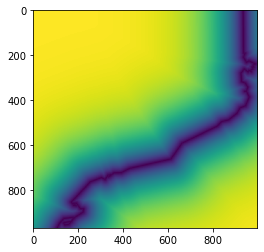

In [6]:
import matplotlib.pyplot as plt
plt.imshow(dcoast_array)
plt.show()

The required raster fields where the regression models will be applied have been created.